<a href="https://colab.research.google.com/github/zahriha/capstone_Xplisit/blob/main/ML/transfer_learning_nails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile
import random
import tensorflow as tf
import shutil
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from shutil import copyfile
from os import getcwd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np



In [2]:
path_nails = f"/content/nail diseases.zip"

local_zip = path_nails
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [3]:
ORIGINDIR = "/content/nail diseases"
DATADIR = "/content/Data"
TRAINORTEST = ["training", "testing"]
CATEGORIES = ["aloperia areata", 
              "beau's lines", 
              "bluish nail", 
              "clubbing", 
              "darier's disease", 
              "eczema", 
              "koilonychia", 
              "leukonychia", 
              "lindsay's nails", 
              "muehrck-e's lines", 
              "normal", 
              "onycholycis", 
              "pale nail", 
              "splinter hemmorrage", 
              "terry's nail"]

In [4]:
counter = 0

for trainortest in TRAINORTEST:
  path = os.path.join(DATADIR, trainortest)
  for category in CATEGORIES:
    counter += 1
    originpath = os.path.join(ORIGINDIR, category)
    path2 = os.path.join(path, category)
    if(counter) <= 14:
      print(category, "Datasets Has: ", len(os.listdir(originpath)) ,"Data")
    os.makedirs(path2)
    pass

aloperia areata Datasets Has:  43 Data
beau's lines Datasets Has:  38 Data
bluish nail Datasets Has:  40 Data
clubbing Datasets Has:  37 Data
darier's disease Datasets Has:  44 Data
eczema Datasets Has:  42 Data
koilonychia Datasets Has:  36 Data
leukonychia Datasets Has:  30 Data
lindsay's nails Datasets Has:  36 Data
muehrck-e's lines Datasets Has:  32 Data
normal Datasets Has:  49 Data
onycholycis Datasets Has:  47 Data
pale nail Datasets Has:  33 Data
splinter hemmorrage Datasets Has:  40 Data


In [5]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")
    
    training_sets = int(len(files) * SPLIT_SIZE)
    testing_sets = int(len(files) - training_sets)
    randomed = random.sample(files,len(files))
    training_files = randomed[0:training_sets]
    testing_files = randomed[:testing_sets]
    
    for filename in training_files:
        source = SOURCE + filename
        destination = TRAINING + filename
        copyfile(source, destination)
        
    for filename in testing_files:
        source = SOURCE + filename
        destination = TESTING + filename
        copyfile(source, destination)

In [6]:
normal_DIR = "/content/nail diseases/normal/"
TRAINING_normal_DIR = "/content/Data/training/normal/"
TESTING_normal_DIR = "/content/Data/testing/normal/"

aloperia_DIR = "/content/nail diseases/aloperia areata/"
TRAINING_aloperia_DIR = "/content/Data/training/aloperia areata/"
TESTING_aloperia_DIR = "/content/Data/testing/aloperia areata/"

beau_DIR = "/content/nail diseases/beau's lines/"
TRAINING_beau_DIR = "/content/Data/training/beau's lines/"
TESTING_beau_DIR = "/content/Data/testing/beau's lines/"

bluish_DIR = "/content/nail diseases/bluish nail/"
TRAINING_bluish_DIR = "/content/Data/training/bluish nail/"
TESTING_bluish_DIR = "/content/Data/testing/bluish nail/"

clubbing_DIR = "/content/nail diseases/clubbing/"
TRAINING_clubbing_DIR = "/content/Data/training/clubbing/"
TESTING_clubbing_DIR = "/content/Data/testing/clubbing/"

Darier_DIR = "/content/nail diseases/darier's disease/"
TRAINING_Darier_DIR = "/content/Data/training/darier's disease/"
TESTING_Darier_DIR = "/content/Data/testing/darier's disease/"

eczema_DIR = "/content/nail diseases/eczema/"
TRAINING_eczema_DIR = "/content/Data/training/eczema/"
TESTING_eczema_DIR = "/content/Data/testing/eczema/"

koilonychia_DIR = "/content/nail diseases/koilonychia/"
TRAINING_koilonychia_DIR = "/content/Data/training/koilonychia/"
TESTING_koilonychia_DIR = "/content/Data/testing/koilonychia/"

leukonychia_DIR = "/content/nail diseases/leukonychia/"
TRAINING_leukonychia_DIR = "/content/Data/training/leukonychia/"
TESTING_leukonychia_DIR = "/content/Data/testing/leukonychia/"

lindsay_DIR = "/content/nail diseases/lindsay's nails/"
TRAINING_lindsay_DIR = "/content/Data/training/lindsay's nails/"
TESTING_lindsay_DIR = "/content/Data/testing/lindsay's nails/"

Muehrck_DIR = "/content/nail diseases/muehrck-e's lines/"
TRAINING_Muehrck_DIR = "/content/Data/training/muehrck-e's lines/"
TESTING_Muehrck_DIR = "/content/Data/testing/muehrck-e's lines/"

onycholycis_DIR = "/content/nail diseases/onycholycis/"
TRAINING_onycholycis_DIR = "/content/Data/training/onycholycis/"
TESTING_onycholycis_DIR = "/content/Data/testing/onycholycis/"

pale_nail_DIR = "/content/nail diseases/pale nail/"
TRAINING_pale_nail_DIR = "/content/Data/training/pale nail/"
TESTING_pale_nail_DIR = "/content/Data/testing/pale nail/"

splinter_hemmorrage_DIR = "/content/nail diseases/splinter hemmorrage/"
TRAINING_splinter_hemmorrage_DIR = "/content/Data/training/splinter hemmorrage/"
TESTING_splinter_hemmorrage_DIR = "/content/Data/testing/splinter hemmorrage/"

terry_DIR = "/content/nail diseases/terry's nail/"
TRAINING_terry_DIR = "/content/Data/training/terry's nail/"
TESTING_terry_DIR = "/content/Data/testing/terry's nail/"


split_size = .75

split_data(Darier_DIR, TRAINING_Darier_DIR, TESTING_Darier_DIR, split_size)
split_data(Muehrck_DIR, TRAINING_Muehrck_DIR, TESTING_Muehrck_DIR, split_size)
split_data(aloperia_DIR, TRAINING_aloperia_DIR, TESTING_aloperia_DIR, split_size)
split_data(beau_DIR, TRAINING_beau_DIR, TESTING_beau_DIR, split_size)
split_data(bluish_DIR, TRAINING_bluish_DIR, TESTING_bluish_DIR, split_size)
split_data(clubbing_DIR, TRAINING_clubbing_DIR, TESTING_clubbing_DIR, split_size)
split_data(eczema_DIR, TRAINING_eczema_DIR, TESTING_eczema_DIR, split_size)
split_data(koilonychia_DIR, TRAINING_koilonychia_DIR, TESTING_koilonychia_DIR, split_size)
split_data(leukonychia_DIR, TRAINING_leukonychia_DIR, TESTING_leukonychia_DIR, split_size)
split_data(lindsay_DIR, TRAINING_lindsay_DIR, TESTING_lindsay_DIR, split_size)
split_data(onycholycis_DIR, TRAINING_onycholycis_DIR, TESTING_onycholycis_DIR, split_size)
split_data(pale_nail_DIR, TRAINING_pale_nail_DIR, TESTING_pale_nail_DIR, split_size)
split_data(splinter_hemmorrage_DIR, TRAINING_splinter_hemmorrage_DIR, TESTING_splinter_hemmorrage_DIR, split_size)
split_data(terry_DIR, TRAINING_terry_DIR, TESTING_terry_DIR, split_size)
split_data(normal_DIR, TRAINING_normal_DIR, TESTING_normal_DIR, split_size)

In [7]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/content/Data/training"
training_datagen = ImageDataGenerator(
      rescale = 1.0/255.)

VALIDATION_DIR = "/content/Data/testing"
validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(299,299),
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(299,299),
    class_mode='categorical'
)

Found 431 images belonging to 15 classes.
Found 150 images belonging to 15 classes.


In [34]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam


# Pretrained Model + Fine Tuning (https://keras.io/api/applications/)
# create the base pre-trained model : Xception + global spatial average pooling
base_model = Xception(weights='imagenet', input_shape = (299,299,3), include_top=False, pooling = 'avg')

# add a global spatial average pooling layer
x = base_model.output
# let's add a fully-connected layer
x = Dense(256, activation='relu')(x)
# and a logistic layer -- 18 classes
predictions = Dense(15, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
opt = Adam(lr=0.001, decay = 1e-6, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

callbacks=myCallback()
# train the model on the new data for a few epochs
model.fit(train_generator, epochs=4, validation_data = validation_generator, verbose = 1)

# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from Xception. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

# we chose to train the last inception blocks, i.e. we will freeze
# the first 125 layers and unfreeze the rest:
for layer in model.layers[:125]:
    layer.trainable = False
for layer in model.layers[125:]:
    layer.trainable = True
# we need to recompile the model for these modifications to take effect
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
history = model.fit(
    train_generator, 
    epochs=4, 
    validation_data = validation_generator, 
    verbose = 1
    )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/4
14/14 [==============================] - 8s 401ms/step - loss: 2.5405 - accuracy: 0.1949 - val_loss: 2.0570 - val_accuracy: 0.3533
Epoch 2/4
14/14 [==============================] - 5s 362ms/step - loss: 1.8703 - accuracy: 0.4432 - val_loss: 1.5733 - val_accuracy: 0.6067
Epoch 3/4
14/14 [==============================] - 5s 359ms/step - loss: 1.4362 - accuracy: 0.6497 - val_loss: 1.1630 - val_accuracy: 0.7200
Epoch 4/4
14/14 [==============================] - 5s 364ms/step - loss: 1.0981 - accuracy: 0.7448 - val_loss: 0.9476 - val_accuracy: 0.8133
0 input_10
1 block1_conv1
2 block1_conv1_bn
3 block1_conv1_act
4 block1_conv2
5 block1_conv2_bn
6 block1_conv2_act
7 block2_sepconv1
8 block2_sepconv1_bn
9 block2_sepconv2_act
10 block2_sepconv2
11 block2_sepconv2_bn
12 conv2d_36
13 block2_pool
14 batch_normalization_36
15 add_108
16 block3_sepconv1_act
17 block3_sepconv1
18 block3_sepconv1_bn
19 block3_sepconv2_act
20 block3_sepconv2
21 block3_sepconv2_bn
22 conv2d_37
23 block3_poo

In [37]:
model.save("model_xception_nails_v2.h5")
#convert to json
model_json = model.to_json()
with open("model.json", "w") as json_file:
  json_file.write(model_json)

model.save_weights("model.h5")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


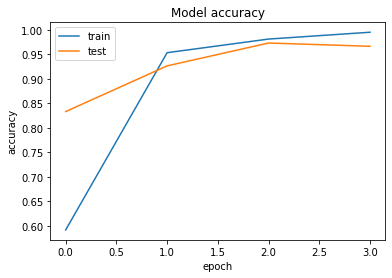

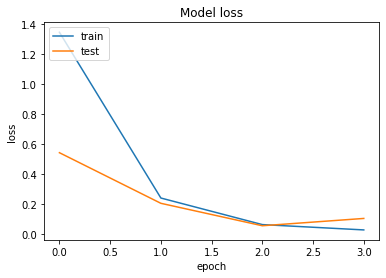

In [38]:
def plot_train_history(history):
    # Summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

plot_train_history(history)

In [ ]:
import tensorflow as tf

# Load the model.
new_model= tf.keras.models.load_model(filepath="model_xception_v2.h5")

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(new_model)
tflite_model = converter.convert()

# Save the TF Lite model.
with tf.io.gfile.GFile('model_xception_v2.tflite', 'wb') as f:
  f.write(tflite_model)

In [71]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow import keras

In [84]:
###prediction
EPOCHS = 25
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((299, 299))
image_size = 0

width=299
height=299
depth=3

In [85]:
#Function to convert images to array
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print("Error : {e}")
        return None

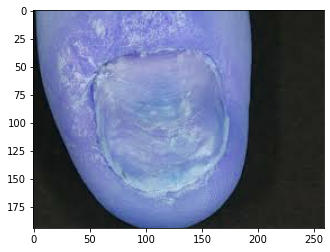

In [96]:
#load saved pickle model
loaded_model = keras.models.load_model('/content/model_xception_nails_v2.h5')

model_disease=loaded_model

#load plant leaf image
image_dir='/content/eczema1.jpg'
img3 = cv2.imread('/content/eczema1.jpg')
plt.imshow(img3)
plt.show()

In [97]:
#convert leaf image to arrays
im=convert_image_to_array(image_dir)
np_image_li = np.array(im, dtype=np.float16) / 299
npp_image = np.expand_dims(np_image_li, axis=0)


result=model_disease.predict(npp_image)
print(result)

itemindex = np.where(result==np.max(result))
print(itemindex[1][0])

[[2.2586430e-03 1.4803426e-04 4.2274518e-08 2.3439053e-08 6.3665651e-02
  9.2217201e-01 1.0932244e-03 6.8826048e-05 2.7990958e-04 5.4007980e-08
  7.9410448e-08 9.5154865e-06 2.2187665e-05 1.7546355e-06 1.0280065e-02]]
5


In [98]:
reverse_mapping = ["aloperia areata",
                   "beau's lines",
                   "bluish nail",
                   "clubbing",
                   "darier's disease",
                   "eczema",
                   "koilonychia",
                   "leukonychia",
                   "lindsay's nails",
                   "muehrck-e's lines" ,
                   "normal",
                   "onycholycis",
                   "pale nail",
                   "splinter hemmorrage",
                   "terry's nail"]
prediction_name = reverse_mapping[itemindex[1][0]]
print(prediction_name)


#printing result
itemindex = np.where(result==np.max(result))
print("Probability of " + prediction_name + "  is: " +str(np.max(result)))
print("Final Diagonasis result : " +prediction_name)

eczema
Probability of eczema  is: 0.922172
Final Diagonasis result : eczema
